In [19]:
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
adata = sc.read_10x_mtx(
    'C:/Users/Computer/Desktop/pbmc3k_filtered_gene_bc_matrices.tar/pbmc3k_filtered_gene_bc_matrices/hg19',  # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)   

x = adata._X.todense()
x.shape #shape of the data

(2700, 32738)

#                                                                Marker Genes
### Genes we want to filter to characterize cell types
|Cell type | gene name|
|----------|----------|
|native CD4+ T-Cells|IL7R, CCR7|
|Memory T-Cells CD4+| ILR7, S100A4|
|Natural Killer Cells|GNLY, NKG7|
|B-Cells|MS4A1|
|CD8+ T-Cells|CD88A|
|FCGR3A+ Monocytes| FCGR3A, MS4A7|
|CD14+ Monocytes|CD14, LYZ|
|Dendritic Cells| FCER1A, CST3|
|Platelets| PBPP|

In [20]:
marker_genes = ['IL7R','CCR7','ILR7','S100A4','GNLY','NKG7','MS4A1','CD88A',
                'FCGR3A','MS4A7','CD14','LYZ','FCER1A','CST3','PBPP']
#create a list with all marker genes

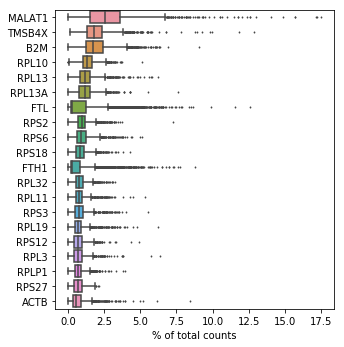

In [21]:
sc.pl.highest_expr_genes(adata,n_top = 20)

In [22]:
sc.pp.filter_cells(adata,min_genes=200)#filter cells with minimum 200 expressed genes
sc.pp.filter_genes(adata,min_cells=3) #filter genes with at least 3 cells the genes are expressed in
adata

AnnData object with n_obs × n_vars = 2700 × 13714 
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

In [23]:
# das Verhältnis zwischen normaler RNA und mitochondrialer DNA sagt etwas über die Integrität der Zellen aus: 
# Wenn zu viel mtDNA vorhanden ist, dann ist die Zelle wahrscheinlich beschädigt
#daher filtern wir die Zellen raus, in denen das Verhältnis verschoben ist
mtgenes = adata.var_names.str.startswith('MT-')
# das Verhältnis zwischen der mtDNA und der RNA muss berechnet werden
print(mtgenes)

[False False False ... False False False]


In [24]:
adata.obs['mito_percent'] = np.sum(adata[:,mtgenes].X, axis = 1).A1/np.sum(adata.X, axis = 1).A1
adata.obs['n_counts']=adata.X.sum(axis=1).A1

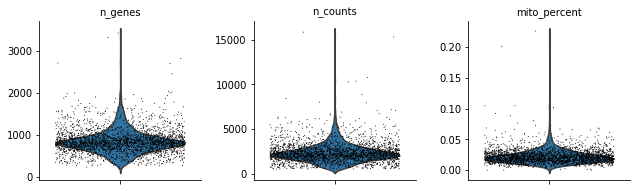

In [25]:
sc.pl.violin(adata,['n_genes','n_counts','mito_percent'],jitter=0.4, multi_panel=True)

In [26]:
adata.var

,gene_ids,n_cells
AL627309.1,ENSG00000237683,9
AP006222.2,ENSG00000228463,3
RP11-206L10.2,ENSG00000228327,5
RP11-206L10.9,ENSG00000237491,3
LINC00115,ENSG00000225880,18
NOC2L,ENSG00000188976,258
KLHL17,ENSG00000187961,9
PLEKHN1,ENSG00000187583,7
RP11-54O7.17,ENSG00000272512,3
HES4,ENSG00000188290,145


In [27]:
adata.X

<2700x13714 sparse matrix of type '<class 'numpy.float32'>'
	with 2282976 stored elements in Compressed Sparse Row format>

In [28]:
adata.obs

,n_genes,mito_percent,n_counts
0,,,
AAACATACAACCAC-1,781,0.030178,2419.0
AAACATTGAGCTAC-1,1352,0.037936,4903.0
AAACATTGATCAGC-1,1131,0.008897,3147.0
AAACCGTGCTTCCG-1,960,0.017431,2639.0
AAACCGTGTATGCG-1,522,0.012245,980.0
AAACGCACTGGTAC-1,782,0.016644,2163.0
AAACGCTGACCAGT-1,783,0.038161,2175.0
AAACGCTGGTTCTT-1,790,0.030973,2260.0
AAACGCTGTAGCCA-1,533,0.011765,1275.0


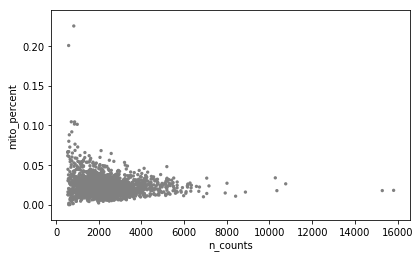

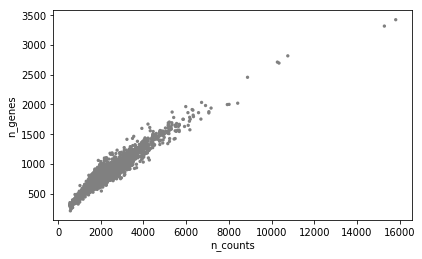

In [29]:
sc.pl.scatter(adata,x='n_counts', y ='mito_percent')
sc.pl.scatter(adata, x='n_counts', y='n_genes')